<a href="https://colab.research.google.com/github/Kishorecsmani/ScalerProject/blob/main/BikeSharingCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='33A2FF'><b>Problem Statement

<font color='33A2FF'>1) To find which variables are significant in predicting the demand for shared electric cycles in the Indian market?

<font color='33A2FF'>2) How well those variables describe the electric cycle demands

<font color='33A2FF'>3) To check if Working Day has an effect on the number of electric cycles rented 

<font color='33A2FF'>4) No. of cycles rented is similar or different in different weather

<font color='33A2FF'>5) No. of cycles rented is similar or different in different season

<font color='33A2FF'>6) Test to check if Weather is dependent on the season

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

In [ ]:
!gdown 1g_3R4fOmmQz3BMpdt4jenMsmDpPXqzOK

Downloading...
From: https://drive.google.com/uc?id=1g_3R4fOmmQz3BMpdt4jenMsmDpPXqzOK
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 110MB/s]


In [ ]:
df = pd.read_csv("bike_sharing.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


<font color='33A2FF'><b>1.Identification of variables and data types:</b></font>


In [ ]:
#rows ans columns of data
df.shape

(10886, 12)

In [ ]:
#checking datatypes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
# Converting datetime column to object to datetime category
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


<ipython-input-7-ba9c065774e7>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<font color='33A2FF'><b>2.Analysing the basic metrics :</b></font>

In [ ]:
# describe on column having integer data type
df.describe(include='all')

<ipython-input-8-9466f66b1992>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [ ]:
df.describe(include=[np.number])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

<font color='#0dab7f'>No missing/null values in all the columns Hence Missing value treatment is not required</font>

In [ ]:
#number of unique values in our data
for i in df.columns:
  print(i, " : ", df[i].nunique())

datetime  :  10886
season  :  4
holiday  :  2
workingday  :  2
weather  :  4
temp  :  49
atemp  :  60
humidity  :  89
windspeed  :  28
casual  :  309
registered  :  731
count  :  822


<font color='#0dab7f'>Categorical columns : Season, holiday, workingday, weather </font>

<font color='#0dab7f'>Non Categorical columns : temp, atemp, humidity, windspeed, casual, registered, count</font>

##<font color='33A2FF'><b> **UNIVARIATE ANALYSIS**

In [ ]:
#Function for Univariate plot for numerical
def univariateNumerical(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure(figsize=(25,5))
  plt.subplot(1,2,1)
  plt.title("HIST PLOT")
  sns.histplot(data = df, x= col, kde=True, color = 'orange' )
  #plt.subplot(1,3,2)
  #plt.title("COUNT PLOT")
  #sns.countplot(data = df, x= col)
  plt.subplot(1,2,2)
  plt.title("BOX PLOT")
  sns.boxplot(x = col, data = df, color = 'green')
  plt.show()

In [ ]:
#Function for Univariate plot for Discrete
def univariateDiscrete(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure()  
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= col)
  plt.xticks(rotation = 90)
  plt.show()

<font color='33A2FF'><b> Missing Value & Outlier Detection 

In [ ]:
# Function to calculate outlier range
def outlier(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  print(" ")
  print('\033[1m'+'\033[95m' +'OUTLIER FOR COLUMN : '+ col )
  print("Outliers:",sum(df[col] > ub) + sum(df[col] < lb))
  print("Lower limit", lb)
  print("Upper limit", ub ,'\033[0m')

In [ ]:
def outlierRemoval(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  df = df[(df[i]>=lb) & (df[i]<=ub)]
  return df

Describe Method
count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64



Value count Method
88    368
94    324
83    316
87    289
70    259
65    253
46    247
66    246
77    244
49    234
Name: humidity, dtype: int64


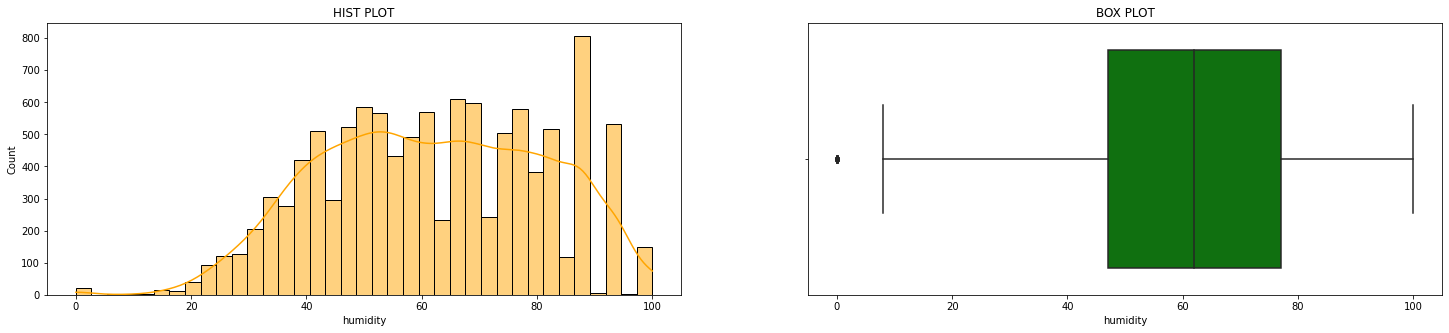

 
OUTLIER FOR COLUMN : humidity
Outliers: 22
Lower limit 2.0
Upper limit 122.0 


In [ ]:
# humidity
univariateNumerical(df, 'humidity')
outlier(df, 'humidity')

<font color='#0dab7f'><b>Observation</b>: More groups/singles used rental bikes when humidity is 88 </font>

<font color='#0dab7f'><b>Outlier</b> : Humidity - Lower limit 2 and upper limit 122 and 22 values out of range</font>

Describe Method
count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64



Value count Method
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
Name: temp, dtype: int64


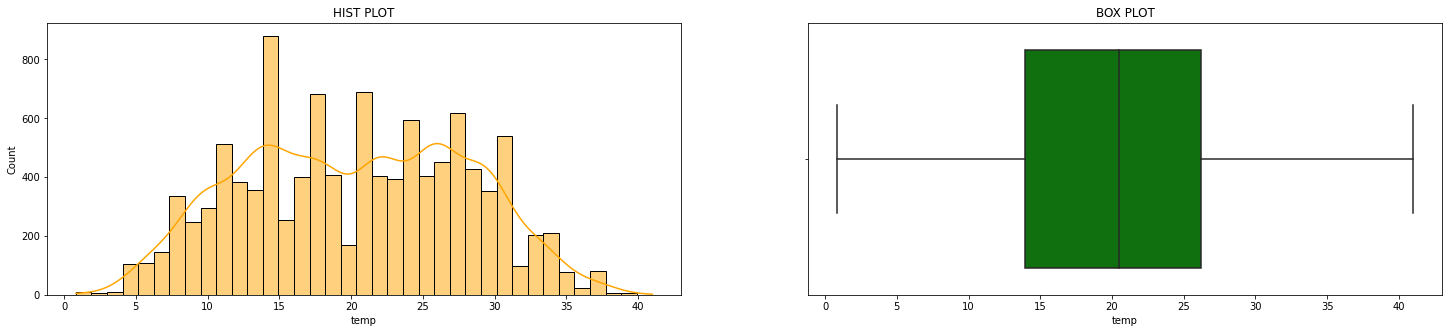

 
OUTLIER FOR COLUMN : temp
Outliers: 0
Lower limit 0
Upper limit 44.69 


In [ ]:
# temp
univariateNumerical(df, 'temp')
outlier(df, 'temp')

<font color='#0dab7f'><b>Observation</b>: More groups/singles used rental bikes when temperature is 14.76 & 26.24 celsius </font>

<font color='#0dab7f'><b>Outlier</b> : Temp - No outliers</font>

Describe Method
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64



Value count Method
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
Name: atemp, dtype: int64


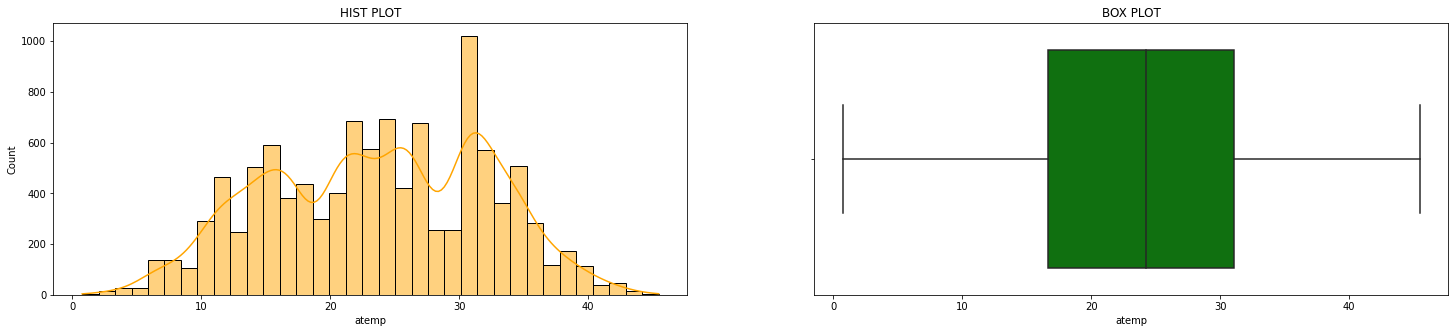

 
OUTLIER FOR COLUMN : atemp
Outliers: 0
Lower limit 0
Upper limit 52.6525 


In [ ]:
# atemp
univariateNumerical(df, 'atemp')
outlier(df, 'atemp')

<font color='#0dab7f'><b>Observation</b>: More groups/singles used rental bikes when feeling temperature is around 31 celsius </font>

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by providing more bikes/attracting offers as the demand is more  when feeling temperature is around 31 degree celsius</font>

<font color='#0dab7f'><b>Outlier</b> : aTemp - No outliers</font>

Describe Method
count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64



Value count Method
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
Name: windspeed, dtype: int64


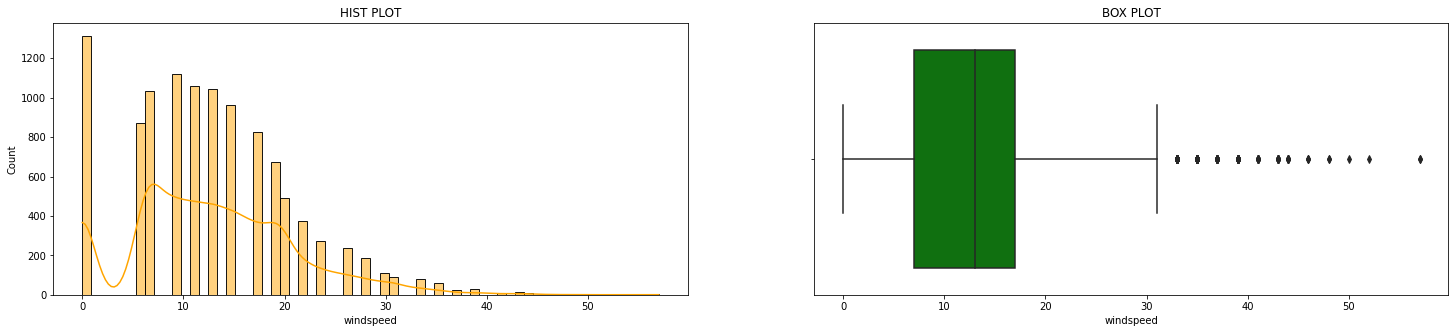

 
OUTLIER FOR COLUMN : windspeed
Outliers: 227
Lower limit 0
Upper limit 31.992500000000003 


In [ ]:
#windspeed
univariateNumerical(df, 'windspeed')
outlier(df, 'windspeed')

<font color='#0dab7f'><b>Observation</b>: More groups/singles used rental bikes when there is no windspeed</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase their business by providing more bikes/attracting offers as the demand is more when the windspeed is not there</font>

<font color='#0dab7f'><b>Outlier</b> : windspeed - lower limit is 0 and upper limit is 32 with 227 outliers</font>

Describe Method
count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64



Value count Method
0    986
1    667
2    487
3    438
4    354
5    332
6    269
8    250
7    250
9    230
Name: casual, dtype: int64


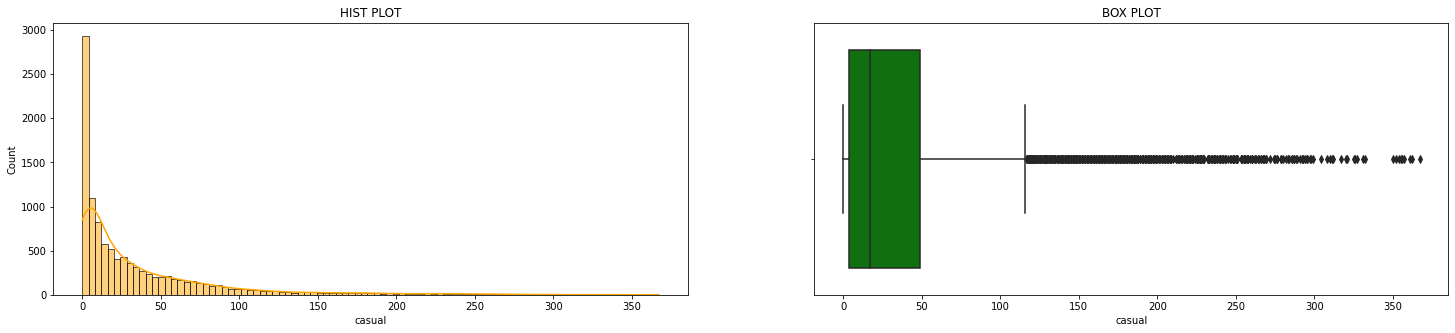

 
OUTLIER FOR COLUMN : casual
Outliers: 749
Lower limit 0
Upper limit 116.5 


In [ ]:
# casual
univariateNumerical(df, 'casual')
outlier(df, 'casual')

<font color='#0dab7f'><b>Observation</b>: More rental bikes are used by single casual users</font>

<font color='#0dab7f'><b>Outlier</b> : casual - lower limit is 0 and upper limit is 116.5 with 749 outliers</font>

Describe Method
count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64



Value count Method
3     195
4     190
5     177
6     155
2     150
1     135
7     126
9     114
8     114
11     87
Name: registered, dtype: int64


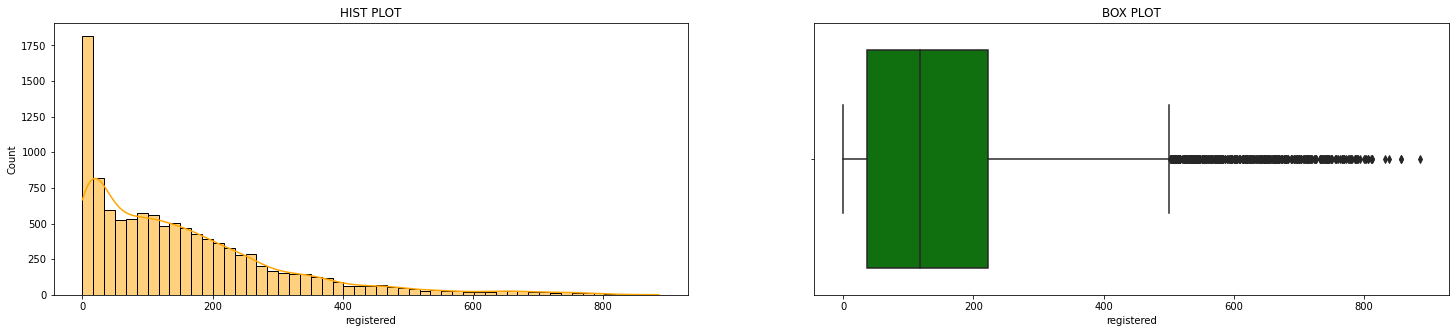

 
OUTLIER FOR COLUMN : registered
Outliers: 423
Lower limit 0
Upper limit 501.0 


In [ ]:
# registered
univariateNumerical(df, 'registered')
outlier(df, 'registered')

<font color='#0dab7f'><b>Observation</b>: More rental bikes are used by group of 3 registered users</font>

<font color='#0dab7f'><b>Outlier</b> : Registered - lower limit is 0 and upper limit is 501 with 423 outliers</font>

Describe Method
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64



Value count Method
5     169
4     149
3     144
6     135
2     132
7     118
1     105
8      99
10     95
11     95
Name: count, dtype: int64


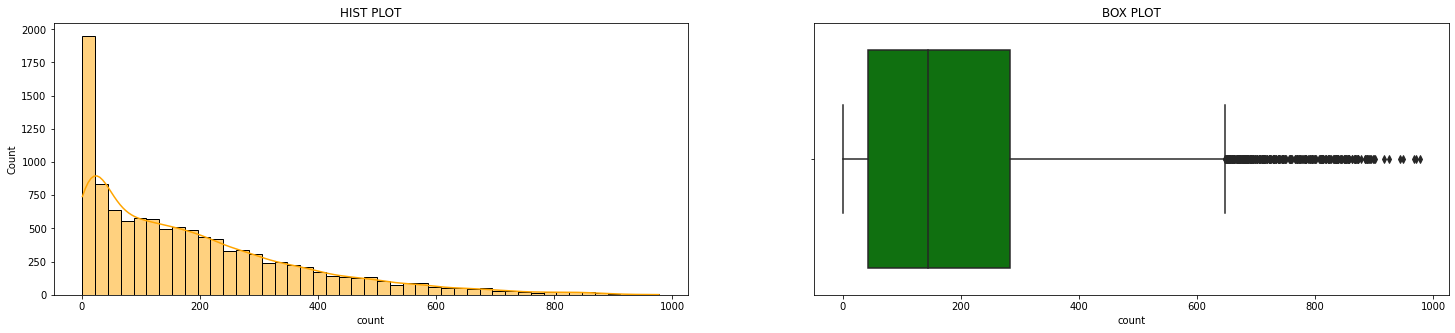

 
OUTLIER FOR COLUMN : count
Outliers: 300
Lower limit 0
Upper limit 647.0 


In [ ]:
# count
univariateNumerical(df, 'count')
outlier(df, 'count')

<font color='#0dab7f'><b>Observation</b>: More rental bikes are used by group of 5 members</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase their business by providing more bikes/attracting offers when people come in group of 5 members</font>

<font color='#0dab7f'><b>Outlier</b> : Count - lower limit is 0 and upper limit is 647 with 300 outliers</font>

Describe Method
count    10886.000000
mean         1.418427
std          0.633839
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weather, dtype: float64



Value count Method
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


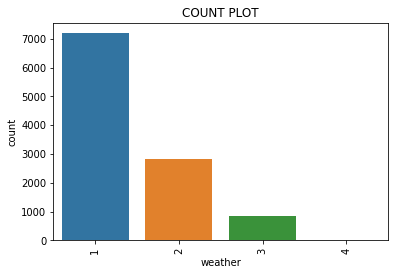

In [ ]:
#weather
univariateDiscrete(df, 'weather')

<font color='#0dab7f'><b>Observation</b>: More groups/singles used rental bikes when weather is clear with few clouds</font>

Describe Method
count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64



Value count Method
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


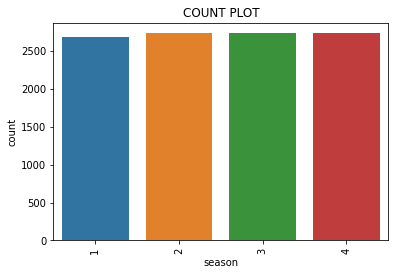

In [ ]:
#season
univariateDiscrete(df, 'season')

<font color='#0dab7f'><b>Observation</b>: Rental bikes are used in all 4 seasons in same range</font>

Describe Method
count    10886.000000
mean         0.028569
std          0.166599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64



Value count Method
0    10575
1      311
Name: holiday, dtype: int64


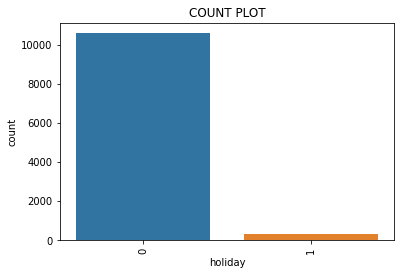

In [ ]:
#holiday
univariateDiscrete(df, 'holiday')

<font color='#0dab7f'><b>Observation</b>:Around 300 groups/singles used rental bikes during holiday</font>

Describe Method
count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64



Value count Method
1    7412
0    3474
Name: workingday, dtype: int64


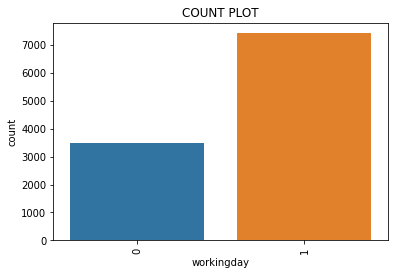

In [ ]:
#workingday
univariateDiscrete(df, 'workingday')

<font color='#0dab7f'><b>Observation</b>: Around 7400 groups/singles used rental bikes </font>

##<font color='33A2FF'><b> **BIVARIATE ANALYSIS**

In [ ]:
# function for Continuous vs discrete BIVARIATE Analysis
def cont_discrete_bivarite(df, x_dis, y_con):
  plt.figure(figsize=(25,5))
  plt.subplot(1,3,1)
  plt.title("BOX PLOT")
  sns.boxplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,2)
  plt.title("VIOLIN PLOT")
  sns.violinplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,3)
  plt.title("BAR PLOT")
  sns.barplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# function for discrete vs discrete BIVARIATE Analysis
def discrete_discrete_bivarite(df, x_dis, hue = None ):
  plt.figure(figsize=(15,5))
  plt.subplot(1,1,1)
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= x_dis, hue=hue)
  plt.show()

In [ ]:
# Function to group by discrete column, sum the counts of bike users and plotting the graph between discrete column and number of users 
def dis_bikeUsers(df, col):
  df_dis_bikeUsers = df.groupby(col)['count'].sum().to_frame().reset_index()
  print(df_dis_bikeUsers)
  sns.barplot(data = df_dis_bikeUsers, x= col, y='count')
  plt.show()

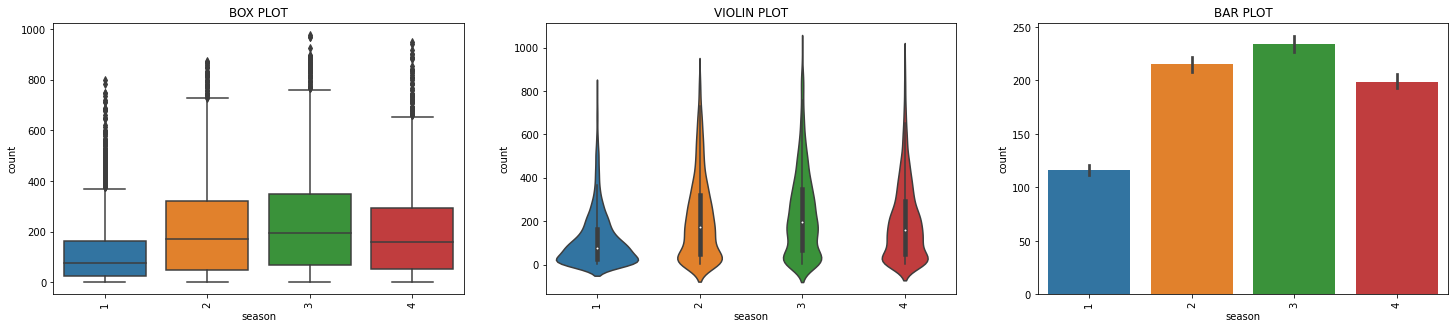

Grouping by seasons, sum the counts of bike users and plotting the graph between season and number of users
   season   count
0       1  312498
1       2  588282
2       3  640662
3       4  544034


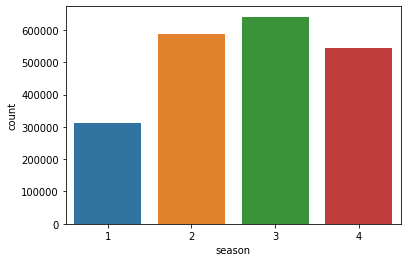

In [ ]:
# Bivariate season and count
cont_discrete_bivarite(df, 'season' ,'count')
# grouping by seasons, sum the counts of bike users and plotting the graph between season and number of users 
print("Grouping by seasons, sum the counts of bike users and plotting the graph between season and number of users")
dis_bikeUsers(df, 'season')

<font color='#0dab7f'><b>Observation</b>: More rental bikes are used during Fall season around 640000. Less bikes are used during Spring season around 310000 during 2 years period.</font>

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by increasing rental bikes during Fall season as the demand is more during Fall season. Company can provide attracting offers/discounts to increase their buisness during spring season as the use of rental bikes is less during spring season.</font>

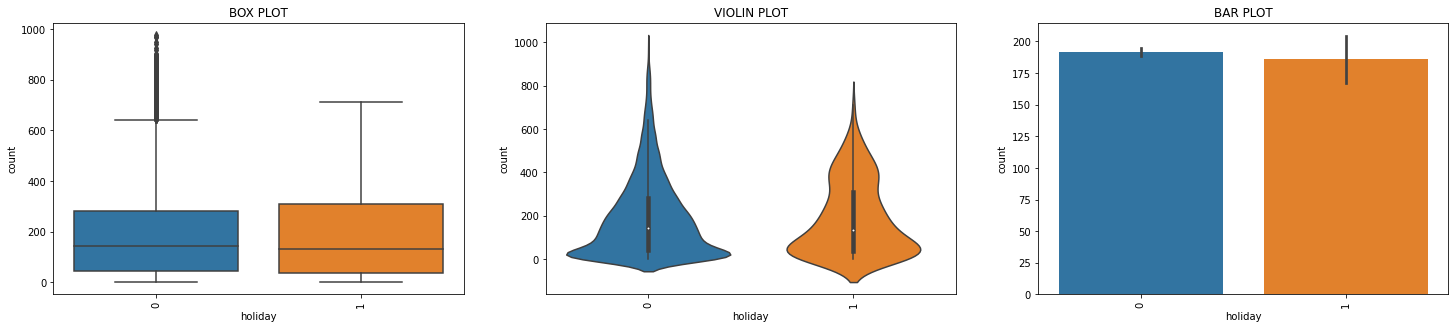


Grouping by holiday, sum the counts of bike users and plotting the graph between holiday and number of users

   holiday    count
0        0  2027668
1        1    57808


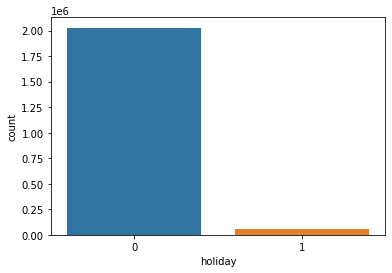

In [ ]:
# Bivariate holiday and count
cont_discrete_bivarite(df, 'holiday' ,'count')
# grouping by holiday, sum the counts of bike users and plotting the graph between holiday and number of users 
print()
print("Grouping by holiday, sum the counts of bike users and plotting the graph between holiday and number of users")
print()
dis_bikeUsers(df, 'holiday')

<font color='#0dab7f'><b>Observation</b>: Around 57000 rental bikes used during holidays of 2 years period..</font>

<font color='#0dab7f'><b>Recommendation</b>:Company can increase their business by providing more bikes/attracting offers offers/discounts to increase their buisness during holidays </font>

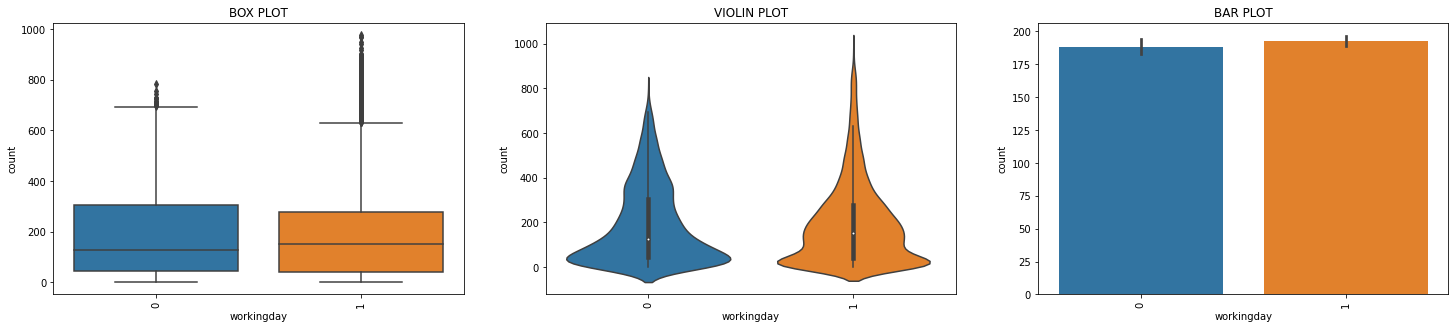


Grouping by workingday, sum the counts of bike users and plotting the graph between workingday and number of users

   workingday    count
0           0   654872
1           1  1430604


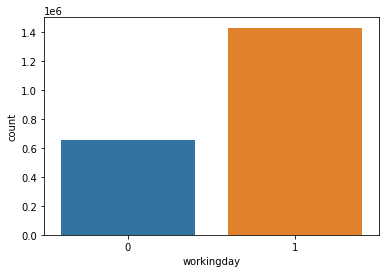

In [ ]:
# Bivariate workingday and count
cont_discrete_bivarite(df, 'workingday' ,'count')
# grouping by workingday, sum the counts of bike users and plotting the graph between workingday and number of users 
print()
print("Grouping by workingday, sum the counts of bike users and plotting the graph between workingday and number of users")
print()
dis_bikeUsers(df, 'workingday')

<font color='#0dab7f'><b>Observation</b>: Around 1430604 rental bikes used during working days of 2 years period.</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase their business by providing more bikes/attracting offers during working days as the demand is more </font>

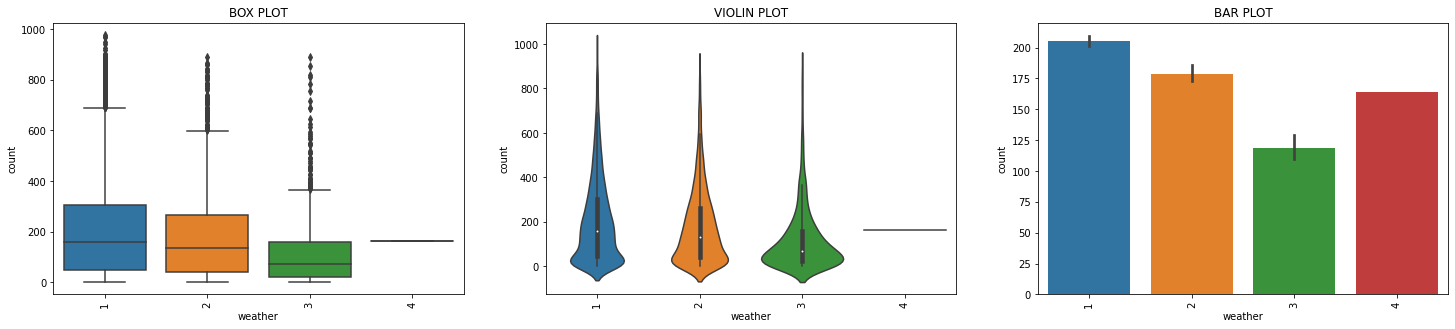


Grouping by weather, sum the counts of bike users and plotting the graph between weather and number of users

   weather    count
0        1  1476063
1        2   507160
2        3   102089
3        4      164


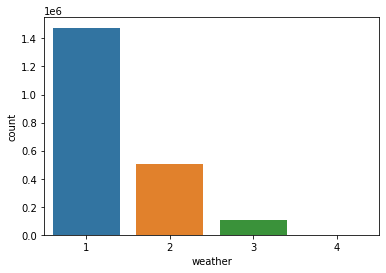

In [ ]:
# Bivariate weather and count
cont_discrete_bivarite(df, 'weather' ,'count')
# grouping by weather, sum the counts of bike users and plotting the graph between weather and number of users 
print()
print("Grouping by weather, sum the counts of bike users and plotting the graph between weather and number of users")
print()
dis_bikeUsers(df, 'weather')

<font color='#0dab7f'><b>Observation</b>: More rental bikes are used around 1476063 during clear weather during 2 years period.</font>

<font color='#0dab7f'><b>Recommendation</b> : Company can increase their business by increasing rental bikes/attracting offers when the weather is clear. </font>

**<font color='33A2FF'><b>CORRELATION MATRIX**

In [ ]:
df_corr = df.corr()
df_corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


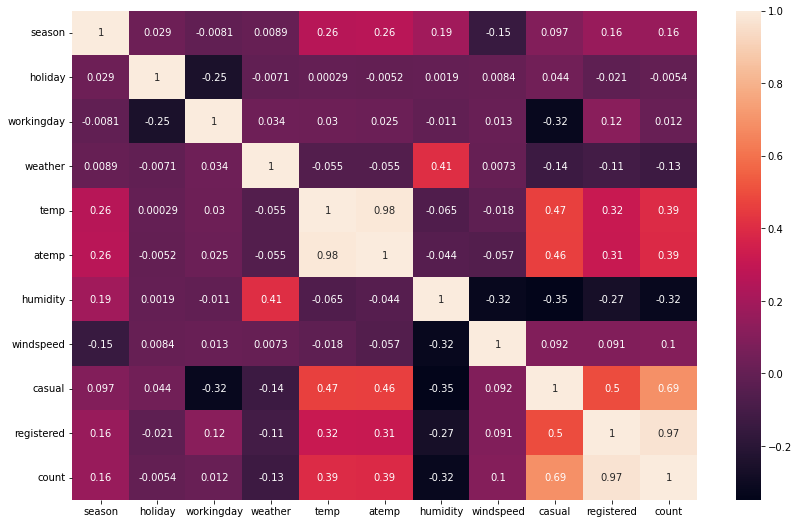

In [ ]:
# HeatMap: All continuos variables
plt.subplots(figsize=(14, 9))
sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values, annot = True)
plt.show()

<font color='#0dab7f'> 1) Registered and count columns has high correlation. Hence we can analyse any one.

<font color='#0dab7f'> 2) temp and atemp columns has high correlation. Hence we can analyse any one.

In [ ]:
import statsmodels.api as sm 
# function to check the distribution is gausian or not, if not gausian , do transformation using box cox and output the gausian curve 
def toCheckGuassian(df):
  sns.displot(df, kde = True)
  plt.plot()
  plt.title("distribution of group before applying transformation")
  fig = sm.qqplot(df, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group before applying transformation")
  df_t, l = stats.boxcox(df) 
  fig = sm.qqplot(df_t, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group after applying transformation")
  sns.displot(df_t, kde = True)
  plt.plot()
  plt.title("distribution of group after applying transformation")
  plt.show()
  return df_t, l

<font color='33A2FF'><b>2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

In [ ]:
df_working = df.loc[df['workingday'] == 1]['count']
df_nworking = df.loc[df['workingday'] == 0]['count']


In [ ]:
# 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 
# Ho : Average number bikes used on Working day is same as Average number bikes used during non working day. 
# Ha : Average number bikes used on Working day is not same as Average number bikes used during non working day. 
# Mu1 = Average number bikes used on Working day
# Mu2 = Average number bikes used on non Working day

n1 = len(df_working)
n2 = len(df_nworking)
m1 = np.mean(df_working)
m2 = np.mean(df_nworking)
s1 = np.std(df_working)
s2 = np.std(df_nworking)
print("mean and std deviation of sample 1 is : ", m1, s1)
print("mean and std deviation of sample 2 is : " , m2, s2)
Tobs = (m1 - m2) / np.sqrt((s1**2/n1) + (s2**2/n2))
pval = 2*np.abs(t.cdf(-Tobs, (n1+n2-2)))
print("Significance level alpha = 5%")
print("Test statistics: ", Tobs)
print("P - Value : ", pval)

mean and std deviation of sample 1 is :  193.01187263896384 184.501211667422
mean and std deviation of sample 2 is :  188.50662061024755 173.69901006897658
Significance level alpha = 5%
Test statistics:  1.2364033017261242
P - Value :  0.21633536943928114


<font color='#0dab7f'><b>Observation</b>: P Value is 21 % which is more than alpha 5% so we fail to reject Null hypothesis. Hence according to T Test average number of bikes used during working day is same as average number of bikes used during non working day</font>

<font color='33A2FF'><b> 1-Way ANOVA to check if No. of cycles rented is similar or different in different weather 

In [ ]:
df_w11 = df.loc[df['weather'] == 1]['count']
df_w21 = df.loc[df['weather'] == 2]['count']
df_w3 = df.loc[df['weather'] == 3]['count']
df_w4 = df.loc[df['weather'] == 4]['count']
print("no of values for w1 : ", df_w11.shape)
print("no of values for w2 : ", df_w21.shape)
print("no of values for w3 : ", df_w3.shape)
print("no of values for w4 : ",df_w4.shape)

no of values for w1 :  (7192,)
no of values for w2 :  (2834,)
no of values for w3 :  (859,)
no of values for w4 :  (1,)


<font color='#0dab7f'><b>Observation</b>: There is only one record for heavy rain and 164 rental bikes used. Igonoring one record of heavy rain and checking the average number bikes used for other weathers</font>

<font color='#0dab7f'> when comparing the total number of records in other weathers minimum is 859 so we use minimum 859 record for each weather condition. So that size of each weather will be same and we can apply Anova single test</font>

In [ ]:
df_w1 = df_w11.head(859)
df_w2 = df_w21.head(859)
print("no of values for w1 : ", df_w1.shape)
print("no of values for w2 : ", df_w2.shape)
print("no of values for w3 : ", df_w3.shape)

no of values for w1 :  (859,)
no of values for w2 :  (859,)
no of values for w3 :  (859,)


===================================================Group1========================================


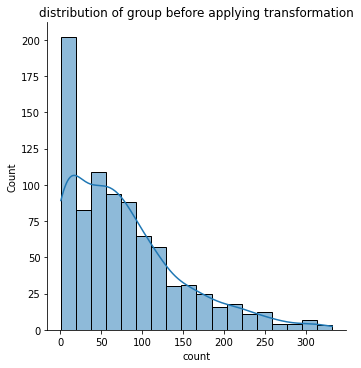

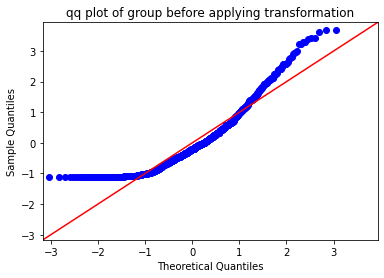

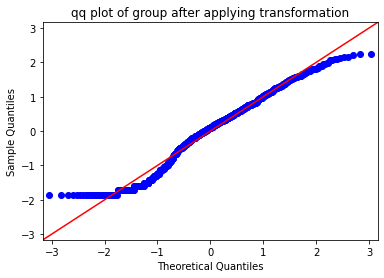

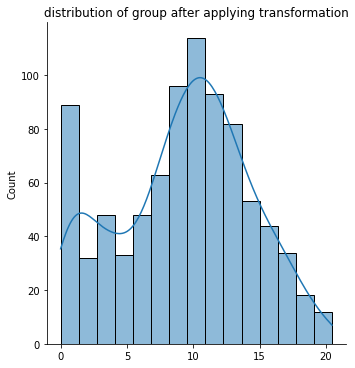

lambda1 :  0.3701745190232524
===================================================Group2========================================


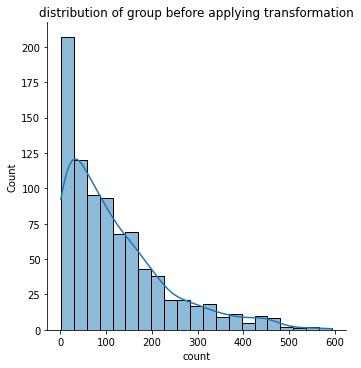

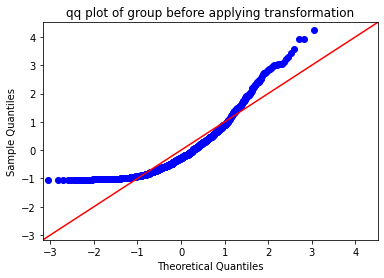

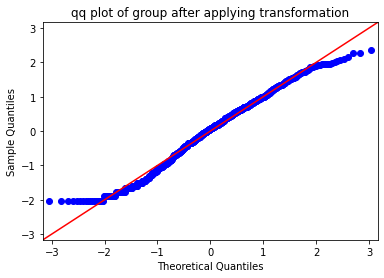

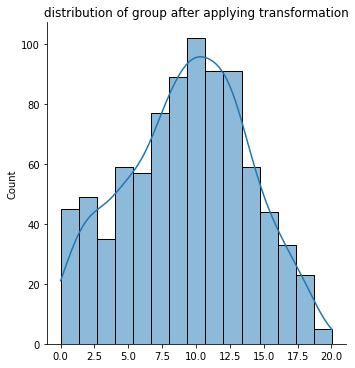

lambda2 :  0.3088874935545666
==================================================Group3=========================================


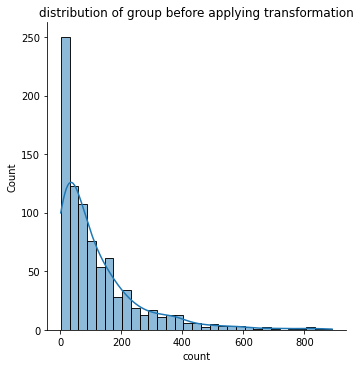

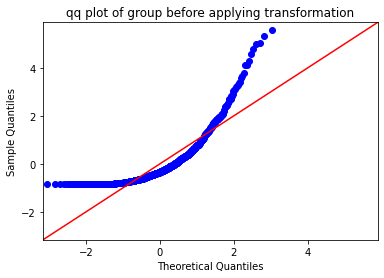

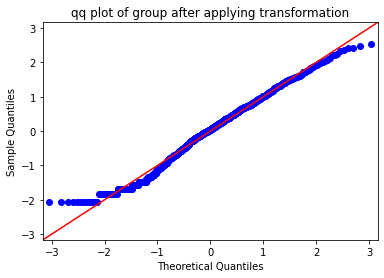

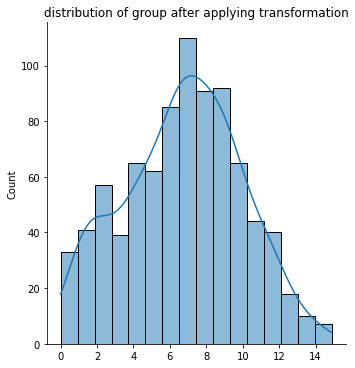

lambda3 :  0.20736671833712544


In [ ]:
# ANNOVA to check if No. of cycles rented is similar or different in different weather 
# Ho : Average number bikes used on different weather is same. 
# Ha : Average number bikes used on different weather is different
# Mu1 = Average number bikes used on clear weather(w1)
# Mu2 = Average number bikes used on mist weather(w2)
# Mu3 = Average number bikes used on light snow weather(w3)
# Mu4 = Average number bikes used on heavy rain weather(w4)

print("===================================================Group1========================================")
df_w1_t, l1 = toCheckGuassian(df_w1)
print("lambda1 : " , l1)

print("===================================================Group2========================================")
df_w2_t, l2 = toCheckGuassian(df_w2)
print("lambda2 : " , l2)

print("==================================================Group3=========================================")
df_w3_t, l3 = toCheckGuassian(df_w3)
print("lambda3 : " , l3)


In [ ]:
m1 = np.mean(df_w1_t)
s1 = np.std(df_w1_t)
m2 = np.mean(df_w2_t)
s2 = np.std(df_w2_t)
m3 = np.mean(df_w3_t)
s3 = np.std(df_w3_t)

print((m1, s1), (m2,s2), (m3, s3))

(9.308004617451362, 4.9647010059671155) (9.308780747145956, 4.538119345608239) (6.714499755521524, 3.2364247999840274)


In [ ]:
# Assumptions of ANOVA
# 1) Each group observations are gausian or nearly gausian (Distribution nearly looks like gausian after applying transformation)
# 2) Each group variance is roughly the same
# 3) Each observation are independent
# As above conditios met we are applying ANOVA single test

from scipy.stats import f_oneway
print(f_oneway(df_w1_t, df_w2_t, df_w3_t ))

F_onewayResult(statistic=103.61005381137196, pvalue=5.275762277920644e-44)


<font color='#0dab7f'><b>Observation</b>: P Value is 5.27*10^-42% which is less than alpha 5% so we reject Null hypothesis. Hence according to ANOVA Test average number of cycles used during different weathers is different</font>

<font color='33A2FF'><b> 1-Way ANOVA to check if No. of cycles rented is similar or different in different season

In [ ]:
df_s1 = df.loc[df['season'] == 1]['count']
df_s2 = df.loc[df['season'] == 2]['count']
df_s31 = df.loc[df['season'] == 3]['count']
df_s41 = df.loc[df['season'] == 4]['count']
print("no of values for s1 : ", df_s1.shape)
print("no of values for s2 : ", df_s1.shape)
print("no of values for s3 : ", df_s31.shape)
print("no of values for s4 : ",df_s41.shape)

no of values for s1 :  (2686,)
no of values for s2 :  (2686,)
no of values for s3 :  (2733,)
no of values for s4 :  (2734,)


<font color='#0dab7f'><b>Observation</b>: When comparing the total number of records in different seasons minimum is 2686 so we use minimum 2686 record for each season condition. So that size of each season will be same and we can apply Anova single test</font>

In [ ]:
df_s3 = df_s31.head(2686)
df_s4 = df_s41.head(2686)
print("no of values for s1 : ", df_s1.shape)
print("no of values for s2 : ", df_s1.shape)
print("no of values for s3 : ", df_s3.shape)
print("no of values for s4 : ",df_s4.shape)

no of values for s1 :  (2686,)
no of values for s2 :  (2686,)
no of values for s3 :  (2686,)
no of values for s4 :  (2686,)


===================================================Group1========================================


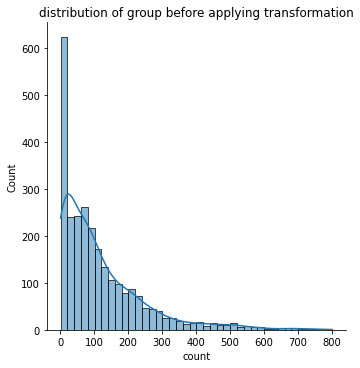

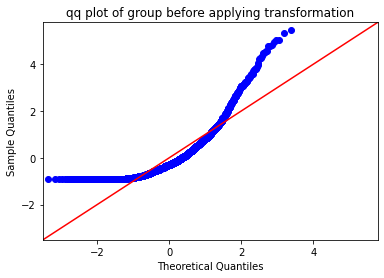

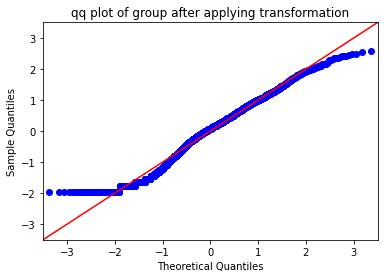

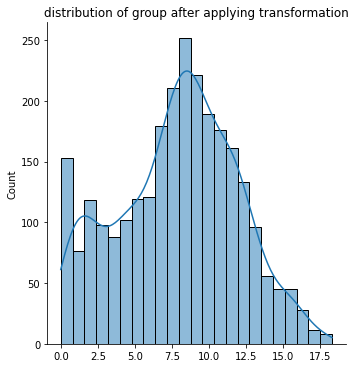

lambda1 :  0.26334701570489333
===================================================Group2========================================


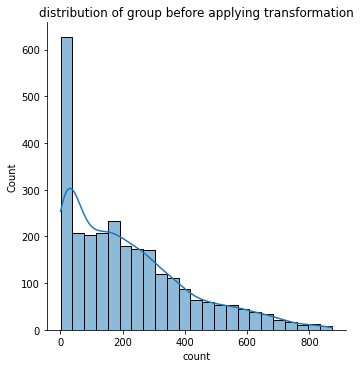

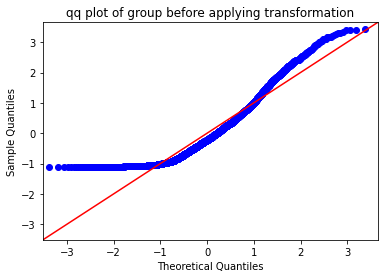

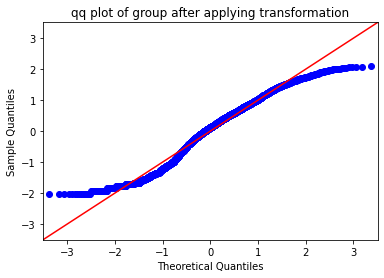

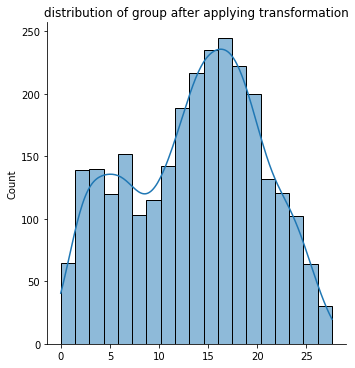

lambda2 :  0.34917159198958714
==================================================Group3=========================================


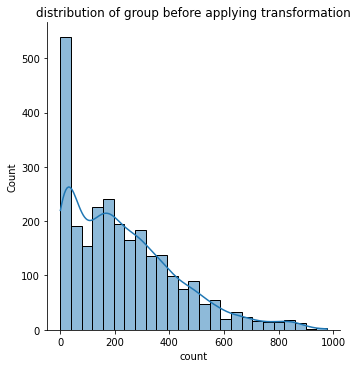

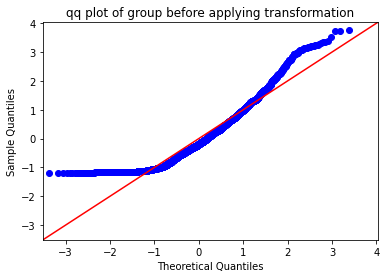

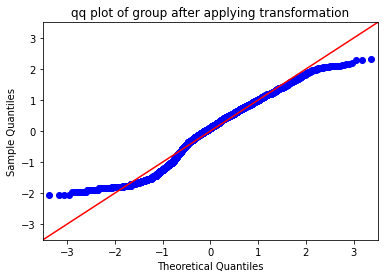

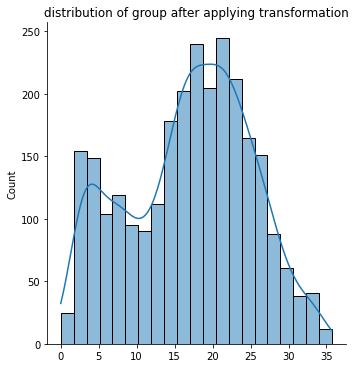

lambda3 :  0.3941764277540548
==================================================Group4=========================================


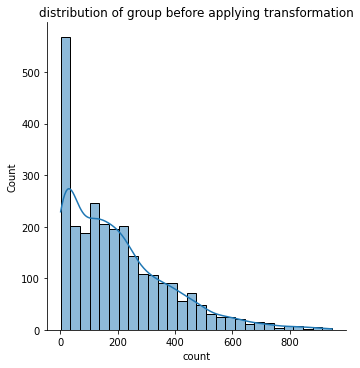

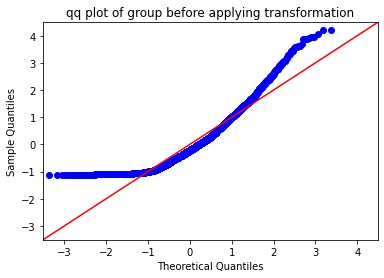

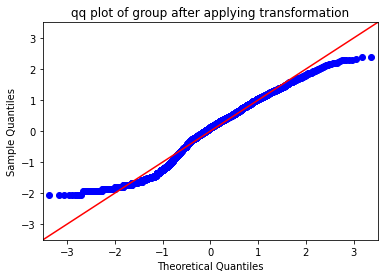

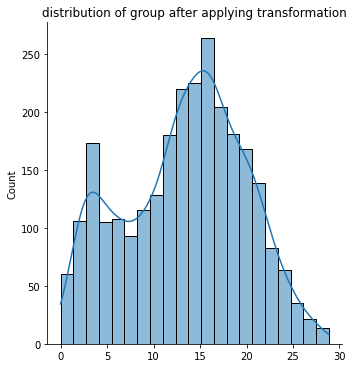

lambda4 :  0.35183911309430854


In [ ]:
# ANNOVA to check if No. of cycles rented is similar or different in different season 
# Ho : Average number bikes used on different season is same. 
# Ha : Average number bikes used on different season is different
# Mu1 = Average number bikes used on spring season(s1)
# Mu2 = Average number bikes used on summer season(s2)
# Mu3 = Average number bikes used on fall season(s3)
# Mu4 = Average number bikes used on winter season(s4)

print("===================================================Group1========================================")
df_s1_t, l1 = toCheckGuassian(df_s1)
print("lambda1 : " , l1)

print("===================================================Group2========================================")
df_s2_t, l2 = toCheckGuassian(df_s2)
print("lambda2 : " , l2)

print("==================================================Group3=========================================")
df_s3_t, l3 = toCheckGuassian(df_s3)
print("lambda3 : " , l3)

print("==================================================Group4=========================================")
df_s4_t, l4 = toCheckGuassian(df_s4)
print("lambda4 : " , l4)

In [ ]:
m1 = np.mean(df_s1_t)
s1 = np.std(df_s1_t)
m2 = np.mean(df_s2_t)
s2 = np.std(df_s2_t)
m3 = np.mean(df_s3_t)
s3 = np.std(df_s3_t)
m4 = np.mean(df_s4_t)
s4 = np.std(df_s4_t)

print((m1, s1), (m2,s2), (m3, s3), (m4, s4))

(7.8639470386426895, 4.030523243229806) (13.642905694810976, 6.684198954140307) (16.917708224611125, 8.143697851928462) (13.37373246525714, 6.466521730153033)


In [ ]:
# Assumptions of ANOVA
# 1) Each group observations are gausian or nearly gausian (Distribution nearly looks like gausian after applying transformation)
# 2) Each group variance is roughly the same
# 3) Each observation are independent
# As above conditios met we are applying ANOVA single test

print(f_oneway(df_s1_t, df_s2_t, df_s3_t, df_s4_t ))

F_onewayResult(statistic=895.0720436598701, pvalue=0.0)


<font color='#0dab7f'><b>Observation</b>: P Value is 0% which is less than alpha 5% so we reject Null hypothesis. Hence according to ANOVA Test average number of cycles used during different seasons is different</font>

<font color='33A2FF'><b>Chi-square test to check if Weather is dependent on the season

In [ ]:
# Chi-square test to check if Weather is dependent on the season
# Ho : weather does not impact season
# Ha : weather impacts season

In [ ]:
obs_t = pd.crosstab( df['season'], df['weather'], margins= True, values= df['count'], aggfunc=sum, dropna=True)
obs_t = obs_t.fillna(0)
print(obs_t)

weather          1         2         3      4      All
season                                                
1         223009.0   76406.0   12919.0  164.0   312498
2         426350.0  134177.0   27755.0    0.0   588282
3         470116.0  139386.0   31160.0    0.0   640662
4         356588.0  157191.0   30255.0    0.0   544034
All      1476063.0  507160.0  102089.0  164.0  2085476


In [ ]:
# Under H0 - weather is independent of season
from scipy.stats import chi2_contingency
chi2_contingency(obs_t)

(11769.559450959445,
 0.0,
 16,
 array([[2.21180553e+05, 7.59953534e+04, 1.52975188e+04, 2.45745681e+01,
         3.12498000e+05],
        [4.16375587e+05, 1.43062351e+05, 2.87978002e+04, 4.62619795e+01,
         5.88282000e+05],
        [4.53449224e+05, 1.55800469e+05, 3.13619255e+04, 5.03810967e+01,
         6.40662000e+05],
        [3.85057636e+05, 1.32301826e+05, 2.66317555e+04, 4.27823557e+01,
         5.44034000e+05],
        [1.47606300e+06, 5.07160000e+05, 1.02089000e+05, 1.64000000e+02,
         2.08547600e+06]]))

<font color='#0dab7f'><b>Observation</b>: P Value is 0 % which is less than alpha 5% so we reject Null hypothesis. Hence according to Chi square Test weather impacts season</font>

<font color='33A2FF'><b>CONFIDENCE INTERVAL- To cross check the Hypothesis test

In [ ]:
def ConfidenceInterval1(df, col, category):
  print("Confidence interval -", col,":", category)
  df_p_f = df.loc[df[col]== category]['count']
  print(df_p_f.shape)
  size = 1000
  bootstraped_means = np.empty(size)
  for i in range(size):
    bootstrapped_sample = df_p_f.sample(len(df_p_f), replace = True)
    x_bar = np.mean(bootstrapped_sample)
    bootstraped_means[i] = x_bar
  confidence_interval_99 = np.percentile(bootstraped_means, [0.5, 99.5])
  confidence_interval_95 = np.percentile(bootstraped_means, [2.5, 97.5])
  confidence_interval_90 = np.percentile(bootstraped_means, [5, 95])
  print("Mean : ",np.mean(bootstraped_means))
  print("Std :", np.std(bootstraped_means))
  print("Confidence interval - 99% is :", confidence_interval_99)
  print("Confidence interval - 95% is :", confidence_interval_95)
  print("Confidence interval - 90% is :", confidence_interval_90)
  plt.hist(bootstraped_means, bins = 100,  density=True)
  plt.title("Distribution of sample mean")
  plt.axvline(x=confidence_interval_99[0], c='g')
  plt.axvline(x=confidence_interval_99[1], c='g')
  plt.axvline(x=confidence_interval_95[0], c='r')
  plt.axvline(x=confidence_interval_95[1], c='r')
  plt.axvline(x=confidence_interval_90[0], c='y')
  plt.axvline(x=confidence_interval_90[1], c='y')
  plt.legend(['99%', '99%', '95%', '95%', '90%', '90%'])
  plt.grid()
  plt.show()

Confidence interval - weather : 1
(7192,)
Mean :  205.2685558954394
Std : 2.280483519970267
Confidence interval - 99% is : [199.3879359  211.00513209]
Confidence interval - 95% is : [201.08927976 209.43207036]
Confidence interval - 90% is : [201.61311179 208.86712319]


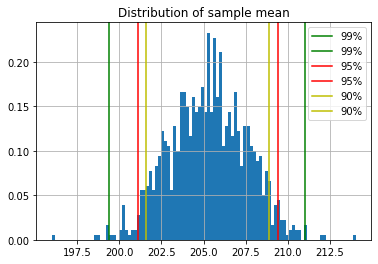

In [ ]:
# weather - 1
ConfidenceInterval1(df, 'weather', 1)

Confidence interval - weather : 2
(2834,)
Mean :  178.79867995765704
Std : 3.0595556919768487
Confidence interval - 99% is : [171.93119266 187.15413726]
Confidence interval - 95% is : [172.98476535 184.90694248]
Confidence interval - 90% is : [173.77260056 183.88242766]


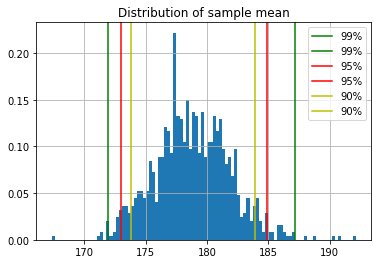

In [ ]:
# weather - 2
ConfidenceInterval1(df, 'weather', 2)

Confidence interval - weather : 3
(859,)
Mean :  119.10933643771827
Std : 4.830845393116277
Confidence interval - 99% is : [106.63076251 131.27261932]
Confidence interval - 95% is : [109.330617   128.75841094]
Confidence interval - 90% is : [110.90291036 126.84132712]


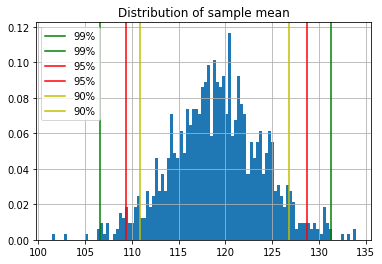

In [ ]:
# weather - 3
ConfidenceInterval1(df, 'weather', 3)

Confidence interval - weather : 4
(1,)
Mean :  164.0
Std : 0.0
Confidence interval - 99% is : [164. 164.]
Confidence interval - 95% is : [164. 164.]
Confidence interval - 90% is : [164. 164.]


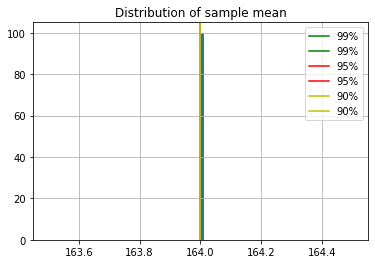

In [ ]:
# weather - 4
ConfidenceInterval1(df, 'weather', 4)

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> 1) Confidence interval of average bikes used during different weathers is not overlapping. It also proves that average bike used during different weather condition is not same and which is already proved using Hypothesis test

<font color='#0dab7f'> 2) Confidence interval of average bikes used during clear weather is more when compared with other weathers. 

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by increasing rental bikes/attracting offers when the weather is clear.

Confidence interval - season : 1
(2686,)
Mean :  116.52645048399107
Std : 2.370423526771266
Confidence interval - 99% is : [110.03232502 122.32154133]
Confidence interval - 95% is : [111.98815153 121.00152643]
Confidence interval - 90% is : [112.78467982 120.4021035 ]


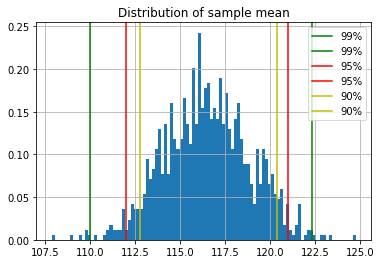

In [ ]:
# season - 1
ConfidenceInterval1(df, 'season', 1)

Confidence interval - season : 2
(2733,)
Mean :  215.26361946578854
Std : 3.751571295782188
Confidence interval - 99% is : [206.32112148 224.80464691]
Confidence interval - 95% is : [208.04935053 222.99681668]
Confidence interval - 90% is : [209.23401025 221.69264544]


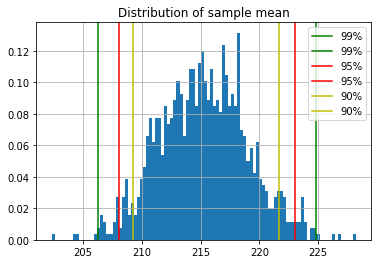

In [ ]:
# season - 2
ConfidenceInterval1(df, 'season', 2)

Confidence interval - season : 3
(2733,)
Mean :  234.31387376509332
Std : 3.6860036355627623
Confidence interval - 99% is : [225.7420966 244.7741438]
Confidence interval - 95% is : [227.05663191 241.0300494 ]
Confidence interval - 90% is : [228.09216978 240.35279912]


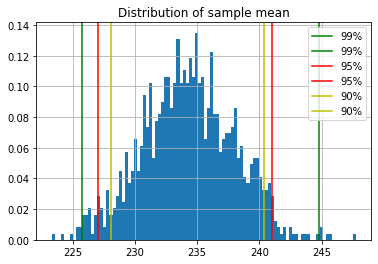

In [ ]:
# season - 3
ConfidenceInterval1(df, 'season', 3)

Confidence interval - season : 4
(2734,)
Mean :  198.95930870519388
Std : 3.363496573033569
Confidence interval - 99% is : [189.86542977 207.47882041]
Confidence interval - 95% is : [192.4013899 205.4349305]
Confidence interval - 90% is : [193.53626554 204.62631675]


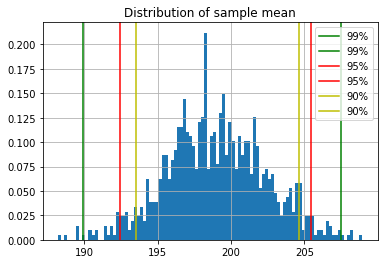

In [ ]:
# season - 4
ConfidenceInterval1(df, 'season', 4)

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> 1) Confidence interval of average bikes used during different seasons is not overlapping. It also proves that average bike used during different seasons is not same and which is already proved using Hypothesis test

<font color='#0dab7f'> 2) Confidence interval of average bikes used during Fall season is more when compared with other seasons. 

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by increasing rental bikes/attracting offers during Fall season.

Confidence interval - workingday : 1
(7412,)
Mean :  193.04555194279547
Std : 2.1269349144252234
Confidence interval - 99% is : [187.90385928 198.04422963]
Confidence interval - 95% is : [188.9688748  197.12585672]
Confidence interval - 90% is : [189.47446708 196.58463303]


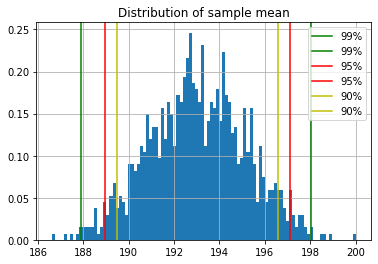

In [ ]:
# workingday - 1
ConfidenceInterval1(df, 'workingday', 1)

Confidence interval - workingday : 0
(3474,)
Mean :  188.56725762809444
Std : 2.9210880896950466
Confidence interval - 99% is : [181.47783535 195.91239637]
Confidence interval - 95% is : [182.87239493 194.3747985 ]
Confidence interval - 90% is : [183.9898388  193.48216753]


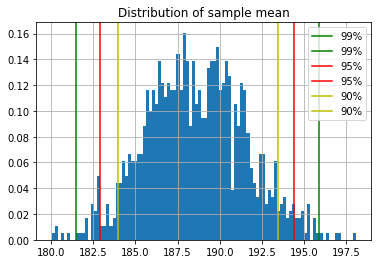

In [ ]:
# workingday - 0
ConfidenceInterval1(df, 'workingday', 0)

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> 1) Confidence interval of average bikes used during working day is overlapping with non working day. It also proves that average bike used during working/non working day is same and which is already proved using Hypothesis test

<font color='#0dab7f'><b>Recommendation</b>: Company can increase their business by increasing rental bikes/attracting offers during working day.

<font color='33A2FF'><b>Actionable items for business:

<font color='#0dab7f'>1)  Company can increase their business by providing more bikes/attracting offers as the demand is more when feeling temperature is around 31 degree celsius.

<font color='#0dab7f'>2) Company can increase their business by providing more bikes/attracting offers as the demand is more when the windspeed is not there.

<font color='#0dab7f'>3) Company can increase their business by providing more bikes/attracting offers when people come in group of 5 members.

<font color='#0dab7f'>4) Company can increase their business by increasing rental bikes during Fall season as the demand is more during Fall season. Company can provide attracting offers/discounts to increase their buisness during spring season as the use of rental bikes is less during spring season.

<font color='#0dab7f'>5) Company can increase their business by providing more bikes/attracting offers offers/discounts to increase their buisness during holidays

<font color='#0dab7f'>6) Company can increase their business by providing more bikes/attracting offers during working days as the demand is more

<font color='#0dab7f'>7) Company can increase their business by increasing rental bikes/attracting offers when the weather is clear.

<font color='#0dab7f'>8) To check if Working Day has an effect on the number of electric cycles rented: T test P Value is 21 % which is more than alpha 5% so we fail to reject Null hypothesis. Hence according to T Test average number of bikes used during working day is same as average number of bikes used during non working day. Also Confidence interval of average bikes used during working day is overlapping with non working day


<font color='#0dab7f'>9) No. of cycles rented is similar or different in different weather: ANOVA test P Value is 5.27 * 10 ^ -42 % which is less than alpha 5 % so we reject Null hypothesis. Hence according to ANOVA Test average number of cycles used during different weathers is different. Also Confidence interval of average bikes used during different weathers is not overlapping


<font color='#0dab7f'> 10) No. of cycles rented is similar or different in different seasons: ANOVA test  P Value is 0 % which is less than alpha 5 % so we reject Null hypothesis. Hence according to ANOVA Test average number of cycles used during different seasons is different. Also Confidence interval of average bikes used during different seasons is not overlapping


<font color='#0dab7f'> 11) Test to check if Weather is dependent on the season : Chi square test P Value is 0 % which is less than alpha 5 % so we reject Null hypothesis. Hence according to Chi square Test weather impacts season